In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

#1. Loading and Exploring the dataset

In [ ]:
df  = pd.read_csv("/content/Housing (1).csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


#Drop rows with NaN(Missing values)

In [ ]:
df.dropna(subset = ["price"],inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


#Scatter plot of Price vs Area

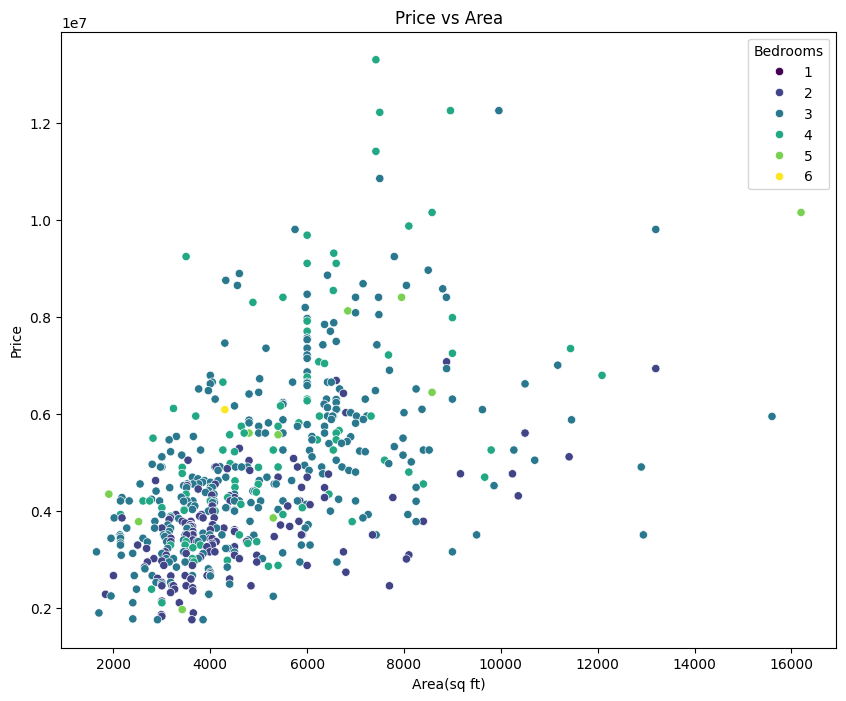

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = "area",y= "price", data = df, hue = "bedrooms",palette = "viridis")
plt.title("Price vs Area")
plt.xlabel("Area(sq ft)")
plt.ylabel("Price")
plt.legend(title = "Bedrooms")
plt.show()

#Distribution Plot of Price

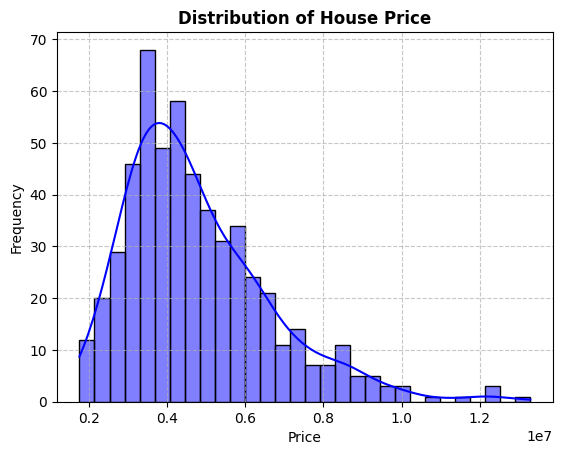

In [ ]:
sns.histplot(df["price"],bins = 30, kde = True, color = "blue",edgecolor = "black")
plt.title("Distribution of House Price",weight = "bold")
plt.xlabel("Price")
plt.ylabel("Frequency")

# Adding a grid
plt.grid(True,linestyle = "--",alpha = 0.7)
plt.show()

# Count Plot of Bedrooms

<ipython-input-7-5f66833bbb27>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "bedrooms",data = df, palette = "viridis")


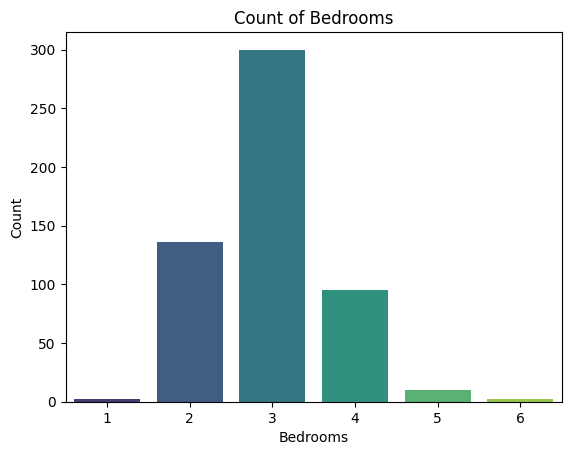

In [ ]:
sns.countplot(x = "bedrooms",data = df, palette = "viridis")
plt.title("Count of Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Count")
plt.show()

#selecting relevant coloumns

In [ ]:
df = df[["bedrooms","area","price"]]
df

,bedrooms,area,price
0,4,7420,13300000
1,4,8960,12250000
2,3,9960,12250000
3,4,7500,12215000
4,4,7420,11410000
...,...,...,...
540,2,3000,1820000
541,3,2400,1767150
542,2,3620,1750000
543,3,2910,1750000


#Creating Independent and Dependent variables

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
X

,bedrooms,area
0,4,7420
1,4,8960
2,3,9960
3,4,7500
4,4,7420
...,...,...
540,2,3000
541,3,2400
542,2,3620
543,3,2910


In [ ]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

#Splitting the dataset into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initializing the linear regression model

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#Training the model

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

#Making Prediction

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([5721232.88463307, 5259089.65566028, 3605915.69248562,
       4675251.06046329, 4270456.3011267 , 5344719.31628917,
       6045325.63052557, 5367037.47021356, 3294535.10838056,
       3780031.88116123, 6764357.84138504, 3564657.7650917 ,
       3481363.45884359, 3935722.17321376, 4274348.55842802,
       4142011.81018336, 2811895.20301771, 5064476.79059462,
       5006092.93107492, 4368798.12354303, 4683035.57506591,
       5385588.01795296, 3453728.43200427, 4208180.18430569,
       5940234.68339011, 6605810.68191468, 3236151.24886086,
       3896799.60020063, 7866902.04754019, 3201120.93314904,
       4286025.33033196, 3943506.68781639, 5064476.79059462,
       5303850.61462538, 5283353.93823533, 4519560.76841075,
       4537465.1519968 , 4662538.89867585, 4083627.95066366,
       4509573.18673424, 5835143.73625465, 3446333.14313177,
       5227951.59724977, 4363870.47635822, 4660717.42114152,
       4324037.16457792, 5064476.79059462, 5230808.4646676 ,
       5166710.87031225,

#Evaluating the model

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Mean Squared Error: {MSE}")
print(f"r2_score: {r2}")

Mean Squared Error: 3280176595474.0137
r2_score: 0.35104738175587247


# Visualizing the results

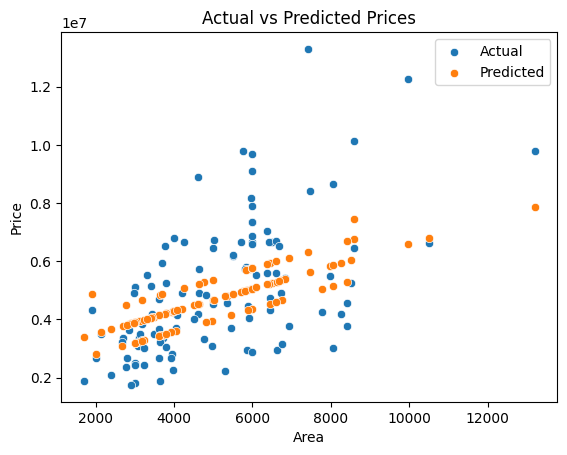

In [ ]:
sns.scatterplot(x=X_test["area"], y=y_test, label="Actual")
sns.scatterplot(x=X_test["area"], y=y_pred, label="Predicted")
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.show()